In [1]:
import pandas as pd
%matplotlib inline

In [28]:
tabela = pd.read_csv('vozila brez nepotrebnih vejc in euro.csv', sep=';', encoding='latin1', low_memory=False)
tabela = tabela[['Registrsko obmocje', 'Masa', 'Znamka', 'Masa', 'ccm', 'Moc', 'Gorivo',
                 'Najvisja hitrost', 'CO2', 'Poraba goriva', 'Okoljevarstvena oznaka', 'Leto izdelave']]

In [61]:
tabela[:10]

Registrsko obmocje  Masa         Znamka  Masa   ccm    Moc Gorivo  \
0              CELJE  2485        BENTLEY  2485  5998  412.0      P   
1              CELJE  2085  MERCEDES BENZ  2085  6209  386.0      P   
2              CELJE  1830            BMW  1830  4999  373.0      P   
3              CELJE  1435        PORSCHE  1435  3996  368.0      P   
4              CELJE  2245        PORSCHE  2245  4806  368.0      P   
5              CELJE  2045        PORSCHE  2045  4806  368.0      P   
6              CELJE  1210        PORSCHE  1210  3600  353.0      P   
7              CELJE  1695        PORSCHE  1695  3600  353.0      P   
8              CELJE  2070  MERCEDES BENZ  2070  4663  335.0      P   
9              CELJE  1635            BMW  1635  2979  331.0      P   

   Najvisja hitrost    CO2  Poraba goriva  Okoljevarstvena oznaka  \
0               323  410.0           17.1                       4   
1               300  335.0           14.9                       4   
2               250  357.0           14.8                       0   
3               310  326.0           13.8                       5   
4               278  270.0           11.5                       5   
5               303  286.0           12.2                       5   
6               310  326.0           13.6                       4   
7               310  326.0           13.6                       4   
8               250  225.0            9.6                       6   
9               250  194.0            8.3                       6   

   Leto izdelave  
0           2005  
1           2008  
2           2005  
3           2012  
4           2010  
5           2010  
6           2007  
7           2007  
8           2015  
9           2016

Za predstavo, kateri avtomibili se vozijo po slovenskih cestah, si poglejmo njihovo porazdelitev po znamkah.

In [130]:
a = tabela.groupby('Registrsko obmocje')['Znamka']
pogoste = ['RENAULT', 'VOLKSWAGEN', 'OPEL', 'CITROEN', 'PEUGEOT', 'FORD', 'SKODA', 'AUDI', 'BMW', 'HYUNDAI']
zn = pd.DataFrame(a.value_counts()).unstack()['Znamka'][pogoste]#.plot(kind='area', stacked=True)
vsote = pd.DataFrame(zn.sum(axis = 1))
vsote
zn_norm = zn.div(zn.sum(axis=1), axis=0)

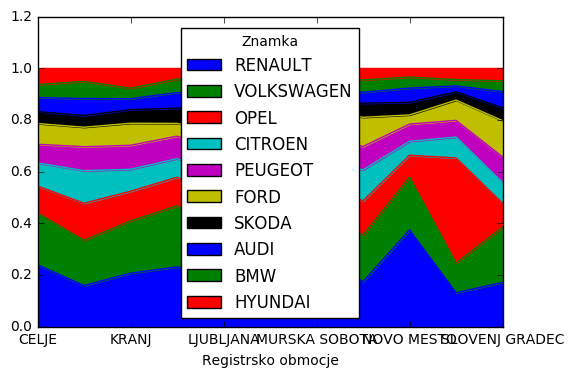

In [131]:
zn_norm.plot(kind='area', stacked=True)

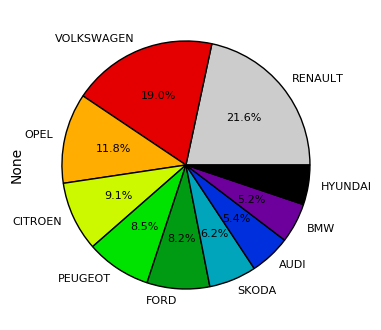

In [96]:
znamke = tabela.groupby('Znamka')
znamke.size().sort_values(ascending=False)[:10].plot(kind='pie',figsize=(4, 4), fontsize=8, autopct='%1.1f%%', colormap='spectral_r')

Največji delež predstavljajo znamke Renault, Volkswagen in Opel.

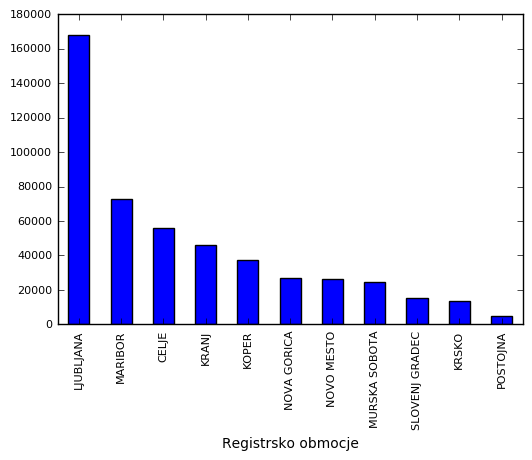

In [5]:
stevilo = tabela.groupby('Registrsko obmocje')
stevilo.size().sort_values(ascending=False).plot(kind='bar',figsize=(6, 4), fontsize=8)

In [6]:
poraba = tabela[['Registrsko obmocje', 'Poraba goriva', 'CO2']]

In [76]:
skupna_po_krajih = round(poraba.groupby('Registrsko obmocje')[['CO2', 'Poraba goriva']].mean(), 3)
poraba_po_krajih = pd.DataFrame(skupna_po_krajih).sort_values('CO2', ascending=False)
PORABA = poraba_po_krajih
PORABA['CO2%'] = round((PORABA['CO2'] - min(PORABA['CO2'])) / (max(PORABA['CO2']) - min(PORABA['CO2'])), 3)
PORABA['gorivo%'] = round((PORABA['Poraba goriva'] - min(PORABA['Poraba goriva'])) / (max(PORABA['Poraba goriva']) - min(PORABA['Poraba goriva'])), 3)

PORABA.reset_index()

Registrsko obmocje      CO2  Poraba goriva   CO2%  gorivo%
0         NOVA GORICA  147.489          5.941  1.000    0.285
1      SLOVENJ GRADEC  146.748          5.929  0.863    0.270
2               KOPER  145.685          5.800  0.665    0.112
3               KRANJ  145.627          5.876  0.655    0.205
4            POSTOJNA  145.467          5.855  0.625    0.180
5               KRSKO  144.920          5.857  0.523    0.182
6             MARIBOR  144.462          5.863  0.438    0.189
7               CELJE  144.417          6.518  0.430    0.990
8       MURSKA SOBOTA  144.198          5.914  0.389    0.252
9           LJUBLJANA  144.079          6.526  0.367    1.000
10         NOVO MESTO  142.099          5.708  0.000    0.000

Stolpec z odstotki sem dodal, da bi z grafa lahko razbral (ne)ujemanje med porabo goriva in izpustom CO2. 

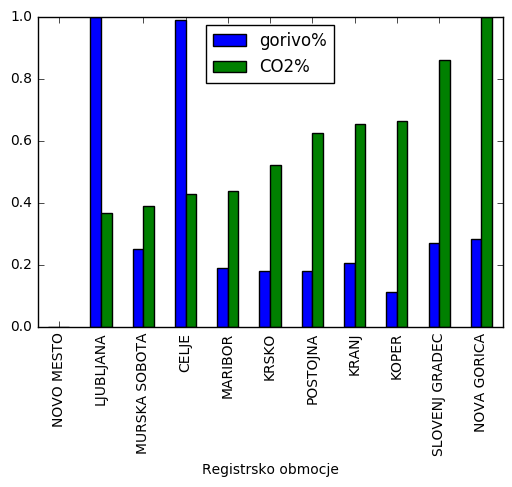

In [66]:
PORABA[['gorivo%', 'CO2%']].plot(kind='bar')

In [77]:
moc = tabela[['Registrsko obmocje', 'Moc', 'Poraba goriva', 'Leto izdelave', 'Okoljevarstvena oznaka']]

In [82]:
moc_kraji = round(moc.groupby('Registrsko obmocje')[['Moc', 'Poraba goriva', 'Leto izdelave', 'Okoljevarstvena oznaka']].mean(), 3)
MOC = pd.DataFrame(moc_kraji).sort_values('Moc', ascending=False)


Dodajmo še stolpce z odstotkovnimi vrednostmi.

In [83]:
MOC['gorivo%'] = round((MOC['Poraba goriva'] - min(MOC['Poraba goriva'])) / (max(MOC['Poraba goriva']) - min(MOC['Poraba goriva'])), 3)
MOC['moc%'] = round((MOC['Moc'] - min(MOC['Moc'])) / (max(MOC['Moc']) - min(MOC['Moc'])), 3)
MOC['leto%'] = round((MOC['Leto izdelave'] - min(MOC['Leto izdelave'])) / (max(MOC['Leto izdelave']) - min(MOC['Leto izdelave'])), 3)
MOC['okolje%'] = round((MOC['Okoljevarstvena oznaka'] - min(MOC['Okoljevarstvena oznaka'])
                 ) / (max(MOC['Okoljevarstvena oznaka']) - min(MOC['Okoljevarstvena oznaka'])), 3)

MOC.reset_index()

Registrsko obmocje     Moc  Poraba goriva  Leto izdelave  \
0           LJUBLJANA  85.262          6.526       2009.592   
1               KOPER  85.228          5.800       2009.071   
2            POSTOJNA  83.209          5.855       2009.938   
3      SLOVENJ GRADEC  82.887          5.929       2009.348   
4         NOVA GORICA  81.844          5.941       2008.554   
5               CELJE  81.640          6.518       2009.097   
6               KRANJ  81.494          5.876       2009.227   
7             MARIBOR  81.148          5.863       2009.302   
8               KRSKO  81.116          5.857       2008.753   
9          NOVO MESTO  79.756          5.708       2009.086   
10      MURSKA SOBOTA  78.442          5.914       2009.451   

    Okoljevarstvena oznaka  gorivo%   moc%  leto%  okolje%  
0                    4.446    1.000  1.000  0.750    0.733  
1                    4.335    0.112  0.995  0.374    0.376  
2                    4.529    0.180  0.699  1.000    1.000  
3                    4.387    0.270  0.652  0.574    0.543  
4                    4.218    0.285  0.499  0.000    0.000  
5                    4.338    0.990  0.469  0.392    0.386  
6                    4.358    0.205  0.448  0.486    0.450  
7                    4.370    0.189  0.397  0.540    0.489  
8                    4.270    0.182  0.392  0.144    0.167  
9                    4.324    0.000  0.193  0.384    0.341  
10                   4.411    0.252  0.000  0.648    0.621

Raziščimo povezavo med porabo goriva in močjo avtomobilov.

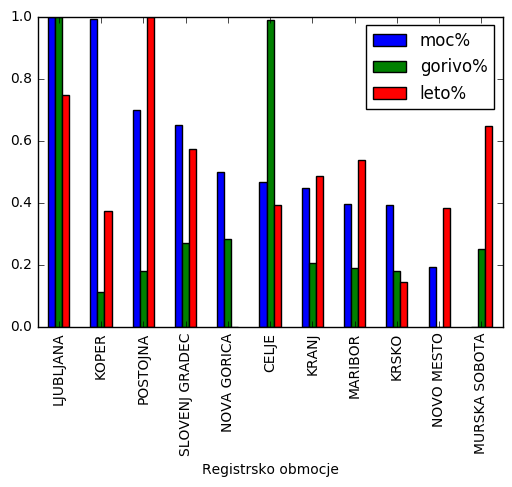

In [85]:
MOC[['moc%', 'gorivo%', 'leto%']].plot(kind='bar')

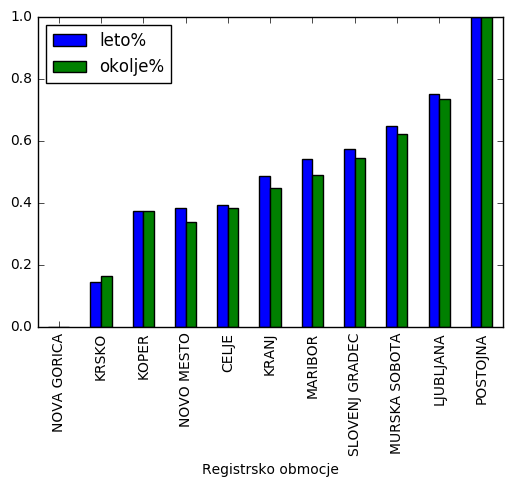

In [12]:
MOC[['leto%', 'okolje%']].plot(kind='bar')

Tam, kjer so avtomobili v povprečju novejši, imajo tudi višjo okoljevarstveno oznako, kar je seveda pričakovano.

In [13]:
co2 = tabela[['Registrsko obmocje', 'CO2']]

In [22]:
co2_kraji = co2.groupby('Registrsko obmocje')['CO2'].mean()
co2_po_krajih = pd.DataFrame(co2_kraji).sort_values('CO2')
CO2 = co2_po_krajih
#CO2

In [15]:
leto = tabela[['Registrsko obmocje', 'Leto izdelave']]

In [20]:
leto_kraji = leto.groupby('Registrsko obmocje')['Leto izdelave'].mean()
leto_po_krajih = pd.DataFrame(leto_kraji).sort_values('Leto izdelave')
LETO = leto_po_krajih
#LETO

In [17]:
euro = tabela[['Registrsko obmocje', 'Okoljevarstvena oznaka']]

In [21]:
euro_kraji = euro.groupby('Registrsko obmocje')['Okoljevarstvena oznaka'].mean()
euro_kraji
euro_po_krajih = pd.DataFrame(euro_kraji).sort_values('Okoljevarstvena oznaka')
EURO = euro_po_krajih
#EURO

In [19]:
#HURA, leto izdelave se ujema z okoljevarstveno oznako!!